In [6]:
import os
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
from datetime import date,datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score 
import time
import matplotlib.pyplot as plt
from sklearn.utils import resample
import datetime
import sys
sys.path.append(R'C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Scoring Worlflow')

In [7]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\RSS")

# Read Data File

In [3]:
df=pd.read_csv(os.getcwd()+r"\Data Files\export_concatenated.csv")

In [4]:
df = df[(df["SOURCE_ID"]=="CIBIL")&(df["CLIENT_EXI_3M"]=="Y")]

# WOE Analysis(Selected Variables)

In [8]:
df.columns

Index(['Unnamed: 0', 'SKP_CREDIT_CASE', 'TIME_DECISION_DATE', 'CLIENT_EXI_3M',
       'RISK_FPD30', 'RISK_FSTQPD30', 'RISK_FSTQPD60', 'SOURCE_ID',
       'ADDRESS_CNT', 'ZIPCODE_CNT', 'ZIPCODE_ADDRESS_RAT',
       'RESIDENCE_ADDRESS_CNT', 'RESIDENCE_ZIPCODE_CNT',
       'RESIDENCE_ZIPCODE_ADDRESS_RAT', 'RESIDENCE_ADDRESS_PCT',
       'OFFICE_ADDRESS_CNT', 'OFFICE_ZIPCODE_CNT',
       'OFFICE_ZIPCODE_ADDRESS_RAT', 'OFFICE_ADDRESS_PCT',
       'PERMANENT_ADDRESS_CNT', 'PERMANENT_ZIPCODE_CNT',
       'PERMANENT_ZIPCODE_ADDRESS_RAT', 'PERMANENT_ADDRESS_PCT',
       'PERMANENT_OFFICE_COMB_RAT', 'RESIDENT_OFFICE_COMB_RAT',
       'PERMANENT_RESIDENCE_COMB_RAT', 'RISK_SCORE'],
      dtype='object')

In [9]:
df_train = df

In [14]:
cols_pred_cat=[]
cols_pred_num = ['RESIDENCE_ZIPCODE_ADDRESS_RAT',
  'ZIPCODE_ADDRESS_RAT',
  'OFFICE_ADDRESS_PCT',
  'ADDRESS_CNT',
  'PERMANENT_ADDRESS_PCT',
  'PERMANENT_ZIPCODE_ADDRESS_RAT','RISK_SCORE']

In [15]:
from scoring.grouping import Grouping

grouping = Grouping(columns = sorted(cols_pred_num),
                    cat_columns = sorted(cols_pred_cat),
                    group_count=3, 
                    min_samples=10000)

grouping.fit(df_train[cols_pred_num],
             df_train["RISK_FSTQPD60"],
          #   w=data[train_mask][col_weight],
            progress_bar=True, category_limit=10000);

grouping.save(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\my_grouping")

data_woe = grouping.transform(df, transform_to='woe', progress_bar=True)

'Grouping saved on 2020-11-03 17:03:11 to file C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\Bigdata\\Common Maps KNN\\my_grouping'

### Plot Bins

***

### ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ADDRESS_CNT,,,,,,,,
"[-inf, 2.5)",309590.0,6314.0,0.0204,0.4597,0.5277,0.1320,0.1379,0.5261
"[2.5, 3.5)",139805.0,3333.0,0.0238,0.2426,0.2374,-0.0208,-0.0217,0.2376
"[3.5, inf)",139107.0,4089.0,0.0294,0.2977,0.2349,-0.2283,-0.2368,0.2364
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0244
Gini: 8.17


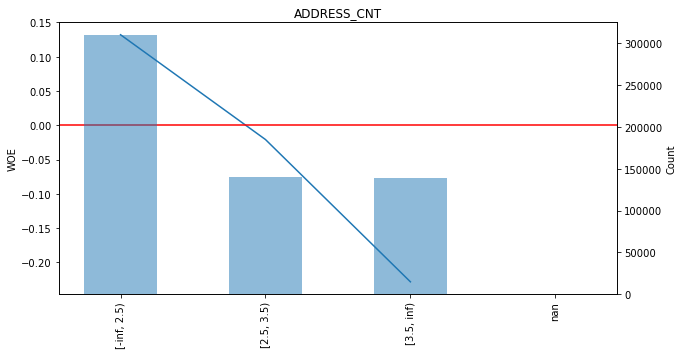

***

### OFFICE_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",200938.0,4683.0,0.0233,0.3409,0.3415,0.0015,0.0015,0.3414
"[0.125, 0.4166)",140551.0,3676.0,0.0262,0.2676,0.2381,-0.1123,-0.1167,0.2388
"[0.4166, inf)",247013.0,5377.0,0.0218,0.3915,0.4204,0.0684,0.0714,0.4197
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0055
Gini: 3.91


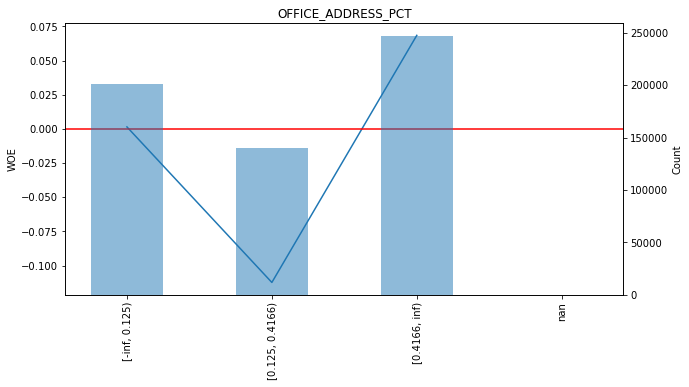

***

### PERMANENT_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",414920.0,8709.0,0.0210,0.6340,0.7067,0.1040,0.1086,0.7050
"[0.125, 0.2916)",47894.0,1622.0,0.0339,0.1181,0.0805,-0.3702,-0.3831,0.0814
"[0.2916, inf)",125688.0,3405.0,0.0271,0.2479,0.2128,-0.1471,-0.1529,0.2136
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0277
Gini: 7.79


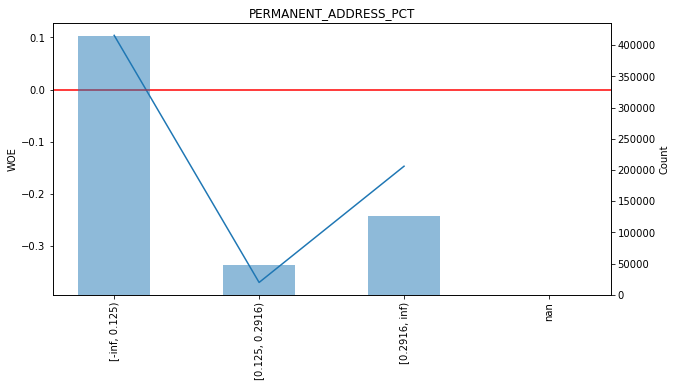

***

### PERMANENT_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.7084)",15257.0,610.0,0.0400,0.0444,0.0255,-0.5381,-0.5554,0.0259
"[0.7084, inf)",158325.0,4417.0,0.0279,0.3216,0.2678,-0.1763,-0.1830,0.2690
nan,414920.0,8709.0,0.0210,0.6340,0.7067,0.1040,0.1086,0.7050


IV: 0.0283
Gini: 7.64


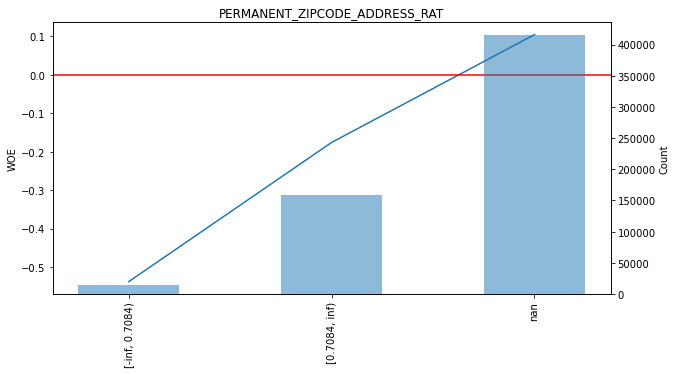

***

### RESIDENCE_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.875)",93212.0,2425.0,0.0260,0.1765,0.1580,-0.1070,-0.1113,0.1584
"[0.875, inf)",435374.0,9861.0,0.0226,0.7179,0.7403,0.0295,0.0308,0.7398
nan,59916.0,1450.0,0.0242,0.1056,0.1017,-0.0356,-0.0371,0.1018


IV: 0.0029
Gini: 2.37


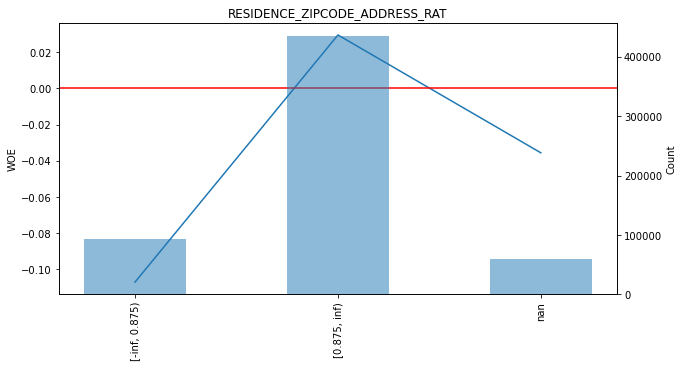

***

### RISK_SCORE

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RISK_SCORE,,,,,,,,
"[-inf, 0.02923)",429301.0,6268.0,0.0146,0.4563,0.7360,0.4537,0.4780,0.7295
"[0.02923, 0.05528)",119544.0,4730.0,0.0396,0.3444,0.1998,-0.5275,-0.5446,0.2031
"[0.05528, inf)",39657.0,2738.0,0.0690,0.1993,0.0642,-1.1048,-1.1324,0.0674
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.3654
Gini: 29.74


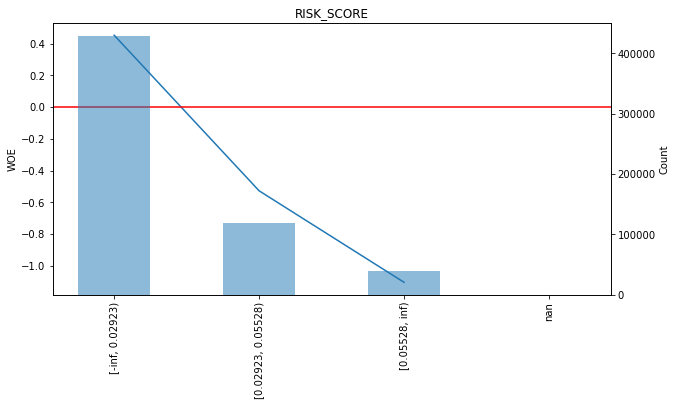

***

### ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.2916)",30720.0,975.0,0.0317,0.0710,0.0518,-0.305,-0.3160,0.0522
"[0.2916, 0.875)",319540.0,7791.0,0.0244,0.5672,0.5424,-0.043,-0.0447,0.5430
"[0.875, inf)",238242.0,4970.0,0.0209,0.3618,0.4059,0.110,0.1148,0.4048
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0122
Gini: 5.32


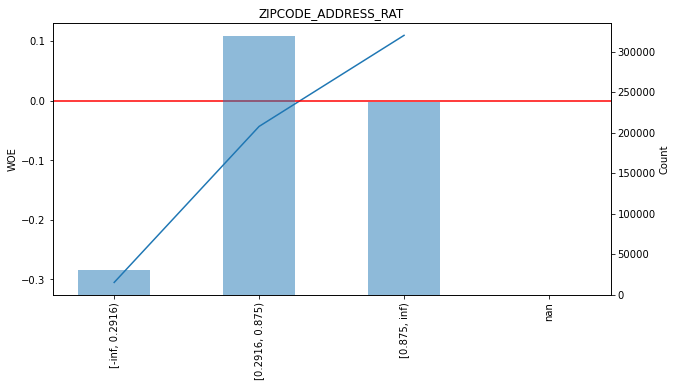

In [16]:
grouping.plot_bins(data=df_train, cols_pred_num=cols_pred_num, cols_pred_cat=cols_pred_cat,
                    mask = pd.Series(df_train["RISK_FSTQPD60"]>=0),col_target="RISK_FSTQPD60", 
                   output_folder=r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN", col_weight=None)

# WOE Analysis(All Variables)

In [17]:
df_train = df

In [18]:
cols_pred_cat=[]
cols_pred_num = ['ADDRESS_CNT', 'ZIPCODE_CNT', 'ZIPCODE_ADDRESS_RAT',
       'RESIDENCE_ADDRESS_CNT', 'RESIDENCE_ZIPCODE_CNT',
       'RESIDENCE_ZIPCODE_ADDRESS_RAT', 'RESIDENCE_ADDRESS_PCT',
       'OFFICE_ADDRESS_CNT', 'OFFICE_ZIPCODE_CNT',
       'OFFICE_ZIPCODE_ADDRESS_RAT', 'OFFICE_ADDRESS_PCT',
       'PERMANENT_ADDRESS_CNT', 'PERMANENT_ZIPCODE_CNT',
       'PERMANENT_ZIPCODE_ADDRESS_RAT', 'PERMANENT_ADDRESS_PCT',
       'PERMANENT_OFFICE_COMB_RAT', 'RESIDENT_OFFICE_COMB_RAT',
       'PERMANENT_RESIDENCE_COMB_RAT','RISK_SCORE']

In [20]:
from scoring.grouping import Grouping

grouping = Grouping(columns = sorted(cols_pred_num),
                    cat_columns = sorted(cols_pred_cat),
                    group_count=3, 
                    min_samples=10000)

grouping.fit(df_train[cols_pred_num],
             df_train["RISK_FSTQPD60"],
          #   w=data[train_mask][col_weight],
            progress_bar=True, category_limit=10000);

grouping.save(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\my_grouping")

data_woe = grouping.transform(df, transform_to='woe', progress_bar=True)

'Grouping saved on 2020-11-03 17:07:42 to file C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\Bigdata\\Common Maps KNN\\my_grouping'

### Plot Bins

***

### ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ADDRESS_CNT,,,,,,,,
"[-inf, 2.5)",309590.0,6314.0,0.0204,0.4597,0.5277,0.1320,0.1379,0.5261
"[2.5, 3.5)",139805.0,3333.0,0.0238,0.2426,0.2374,-0.0208,-0.0217,0.2376
"[3.5, inf)",139107.0,4089.0,0.0294,0.2977,0.2349,-0.2283,-0.2368,0.2364
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0244
Gini: 8.17


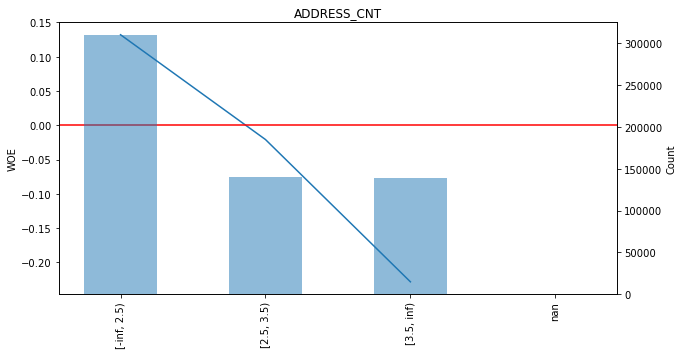

***

### OFFICE_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",200938.0,4683.0,0.0233,0.3409,0.3415,0.0015,0.0015,0.3414
"[0.5, 1.5)",296324.0,6638.0,0.0224,0.4833,0.5040,0.0403,0.0420,0.5035
"[1.5, inf)",91240.0,2415.0,0.0265,0.1758,0.1545,-0.1241,-0.1290,0.1550
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0036
Gini: 2.81


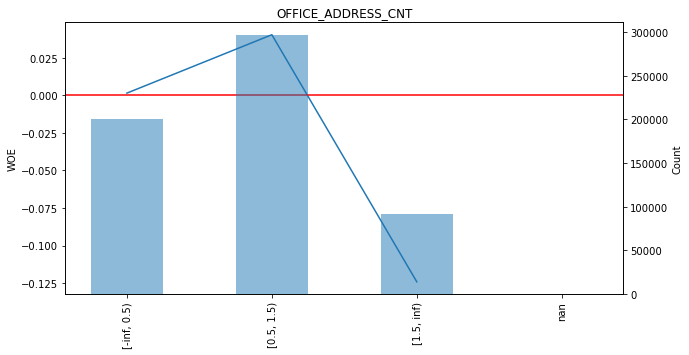

***

### OFFICE_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",200938.0,4683.0,0.0233,0.3409,0.3415,0.0015,0.0015,0.3414
"[0.125, 0.4166)",140551.0,3676.0,0.0262,0.2676,0.2381,-0.1123,-0.1167,0.2388
"[0.4166, inf)",247013.0,5377.0,0.0218,0.3915,0.4204,0.0684,0.0714,0.4197
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0055
Gini: 3.91


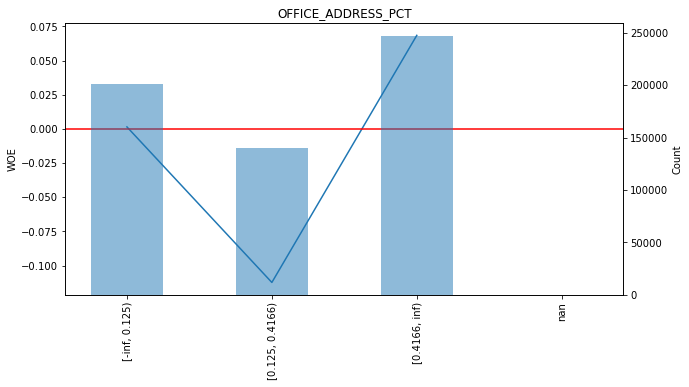

***

### OFFICE_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.875)",45444.0,1164.0,0.0256,0.0847,0.0770,-0.0916,-0.0953,0.0772
"[0.875, inf)",342120.0,7889.0,0.0231,0.5743,0.5815,0.0119,0.0124,0.5813
nan,200938.0,4683.0,0.0233,0.3409,0.3415,0.0015,0.0015,0.3414


IV: 0.0008
Gini: 0.98


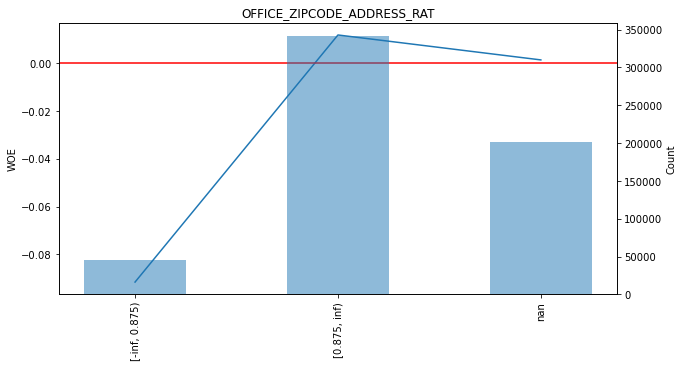

***

### OFFICE_ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ZIPCODE_CNT,,,,,,,,
"[-inf, 0.5)",200986.0,4684.0,0.0233,0.3410,0.3415,0.0015,0.0016,0.3415
"[0.5, 1.5)",333336.0,7580.0,0.0227,0.5518,0.5668,0.0256,0.0267,0.5664
"[1.5, inf)",54180.0,1472.0,0.0272,0.1072,0.0917,-0.1500,-0.1558,0.0921
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0028
Gini: 2.03


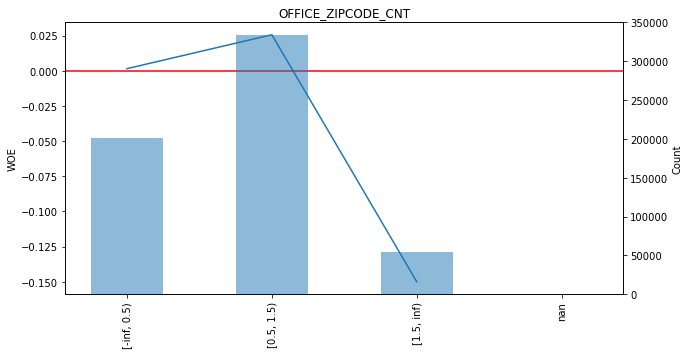

***

### PERMANENT_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",414920.0,8709.0,0.0210,0.6340,0.7067,0.1040,0.1086,0.7050
"[0.5, 1.5)",149921.0,4117.0,0.0275,0.2997,0.2537,-0.1606,-0.1668,0.2548
"[1.5, inf)",23661.0,910.0,0.0385,0.0662,0.0396,-0.4987,-0.5150,0.0402
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0293
Gini: 7.77


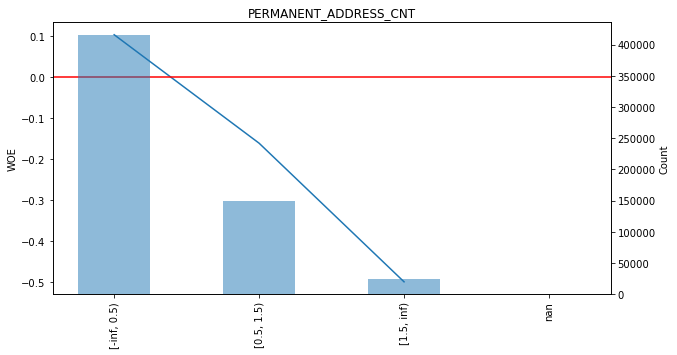

***

### PERMANENT_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",414920.0,8709.0,0.0210,0.6340,0.7067,0.1040,0.1086,0.7050
"[0.125, 0.2916)",47894.0,1622.0,0.0339,0.1181,0.0805,-0.3702,-0.3831,0.0814
"[0.2916, inf)",125688.0,3405.0,0.0271,0.2479,0.2128,-0.1471,-0.1529,0.2136
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0277
Gini: 7.79


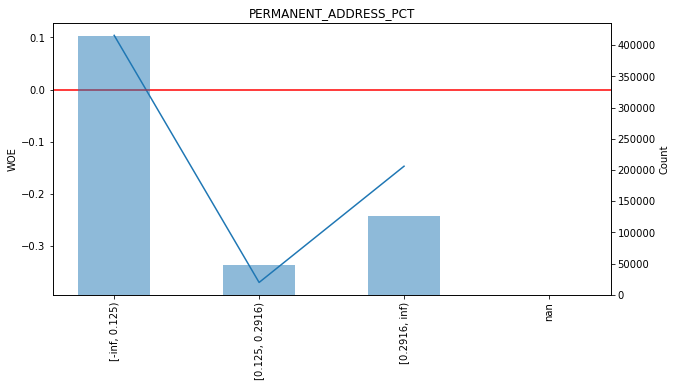

***

### PERMANENT_OFFICE_COMB_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_OFFICE_COMB_RAT,,,,,,,,
"[-inf, 0.5834)",58742.0,1629.0,0.0277,0.1186,0.0994,-0.1703,-0.1769,0.0998
"[0.5834, 0.875)",11315.0,373.0,0.0330,0.0272,0.0190,-0.3431,-0.3552,0.0192
"[0.875, inf)",361699.0,8423.0,0.0233,0.6132,0.6146,0.0022,0.0023,0.6146
nan,156746.0,3311.0,0.0211,0.2410,0.2670,0.0978,0.1021,0.2663


IV: 0.0089
Gini: 4.33


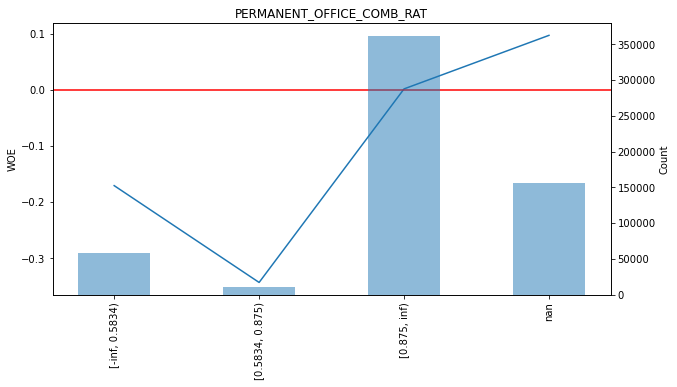

***

### PERMANENT_RESIDENCE_COMB_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_RESIDENCE_COMB_RAT,,,,,,,,
"[-inf, 0.5834)",104440.0,2991.0,0.0286,0.2177,0.1765,-0.2024,-0.2100,0.1775
"[0.5834, 0.875)",20276.0,593.0,0.0292,0.0432,0.0342,-0.2233,-0.2316,0.0345
"[0.875, inf)",428267.0,9424.0,0.0220,0.6861,0.7287,0.0578,0.0603,0.7277
nan,35519.0,728.0,0.0205,0.0530,0.0605,0.1272,0.1329,0.0604


IV: 0.0143
Gini: 5.32


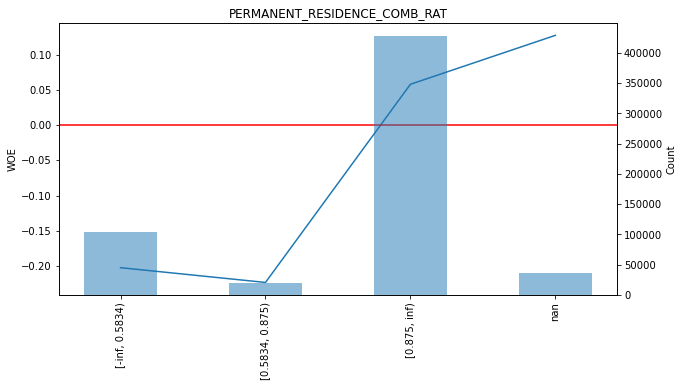

***

### PERMANENT_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.7084)",15257.0,610.0,0.0400,0.0444,0.0255,-0.5381,-0.5554,0.0259
"[0.7084, inf)",158325.0,4417.0,0.0279,0.3216,0.2678,-0.1763,-0.1830,0.2690
nan,414920.0,8709.0,0.0210,0.6340,0.7067,0.1040,0.1086,0.7050


IV: 0.0283
Gini: 7.64


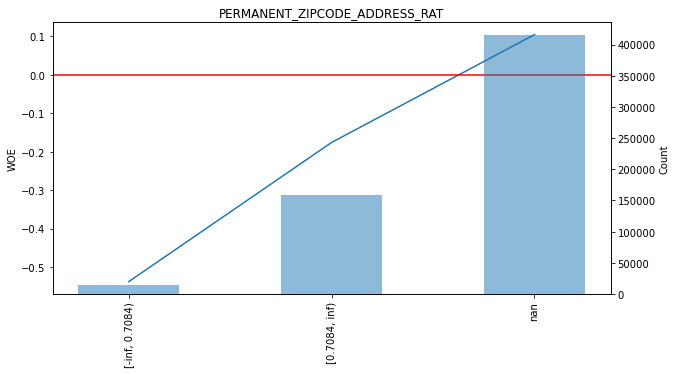

***

### PERMANENT_ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ZIPCODE_CNT,,,,,,,,
"[-inf, 0.5)",414972.0,8710.0,0.021,0.6341,0.7068,0.1040,0.1086,0.7051
"[0.5, inf)",173530.0,5026.0,0.029,0.3659,0.2932,-0.2136,-0.2216,0.2949
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0240
Gini: 7.27


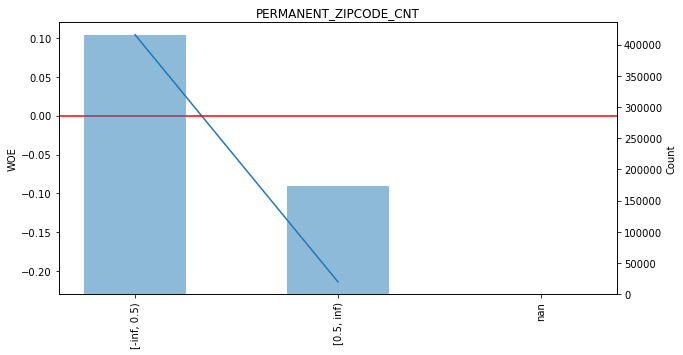

***

### RESIDENCE_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",59916.0,1450.0,0.0242,0.1056,0.1017,-0.0356,-0.0371,0.1018
"[0.5, 1.5)",393279.0,8768.0,0.0223,0.6383,0.6690,0.0450,0.0469,0.6683
"[1.5, inf)",135307.0,3518.0,0.0260,0.2561,0.2293,-0.1064,-0.1106,0.2299
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0045
Gini: 3.25


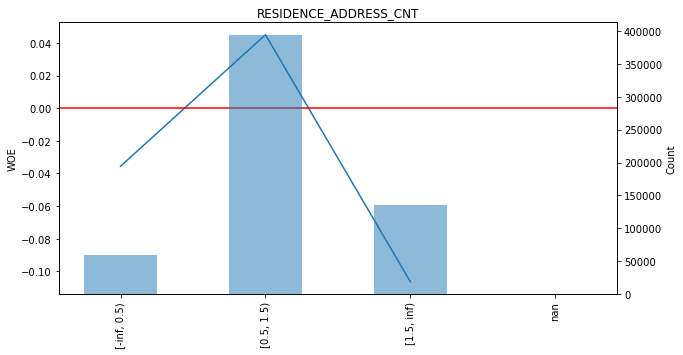

***

### RESIDENCE_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",59916.0,1450.0,0.0242,0.1056,0.1017,-0.0356,-0.0371,0.1018
"[0.125, 0.4166)",127114.0,3417.0,0.0269,0.2488,0.2152,-0.1394,-0.1449,0.2160
"[0.4166, inf)",401472.0,8869.0,0.0221,0.6457,0.6831,0.0540,0.0563,0.6822
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0071
Gini: 4.00


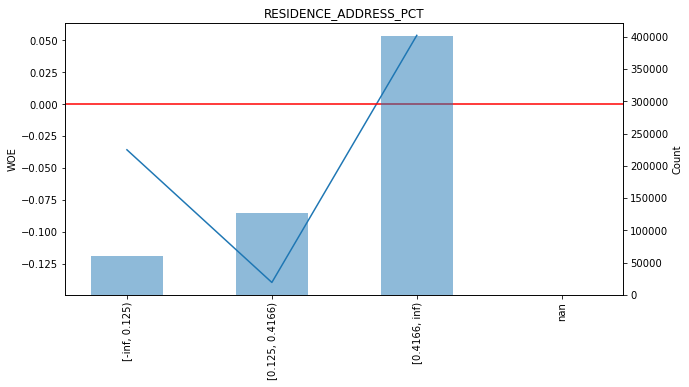

***

### RESIDENCE_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.875)",93212.0,2425.0,0.0260,0.1765,0.1580,-0.1070,-0.1113,0.1584
"[0.875, inf)",435374.0,9861.0,0.0226,0.7179,0.7403,0.0295,0.0308,0.7398
nan,59916.0,1450.0,0.0242,0.1056,0.1017,-0.0356,-0.0371,0.1018


IV: 0.0029
Gini: 2.37


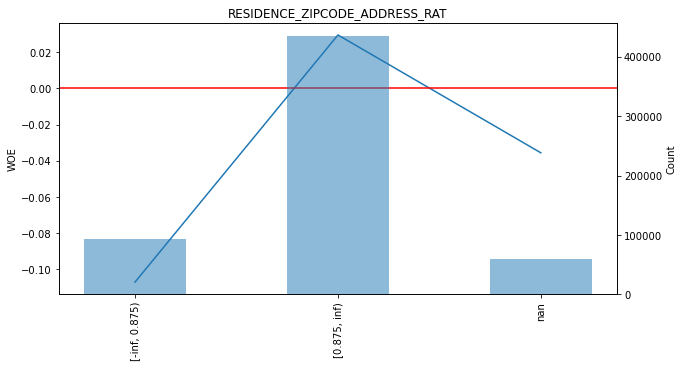

***

### RESIDENCE_ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ZIPCODE_CNT,,,,,,,,
"[-inf, 0.5)",59918.0,1451.0,0.0242,0.1056,0.1017,-0.0362,-0.0377,0.1018
"[0.5, 1.5)",478620.0,10971.0,0.0229,0.7987,0.8136,0.0178,0.0185,0.8133
"[1.5, inf)",49964.0,1314.0,0.0263,0.0957,0.0846,-0.1177,-0.1224,0.0849
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0018
Gini: 1.57


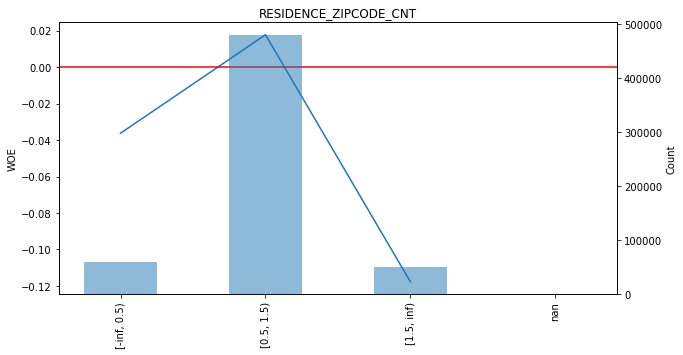

***

### RESIDENT_OFFICE_COMB_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENT_OFFICE_COMB_RAT,,,,,,,,
"[-inf, 0.5834)",142896.0,3243.0,0.0227,0.2361,0.2430,0.0276,0.0287,0.2428
"[0.5834, 0.7084)",34297.0,931.0,0.0271,0.0678,0.0581,-0.1491,-0.1549,0.0583
"[0.7084, inf)",393053.0,9139.0,0.0233,0.6653,0.6679,0.0038,0.0039,0.6679
nan,18256.0,423.0,0.0232,0.0308,0.0310,0.0072,0.0075,0.0310


IV: 0.0017
Gini: 1.39


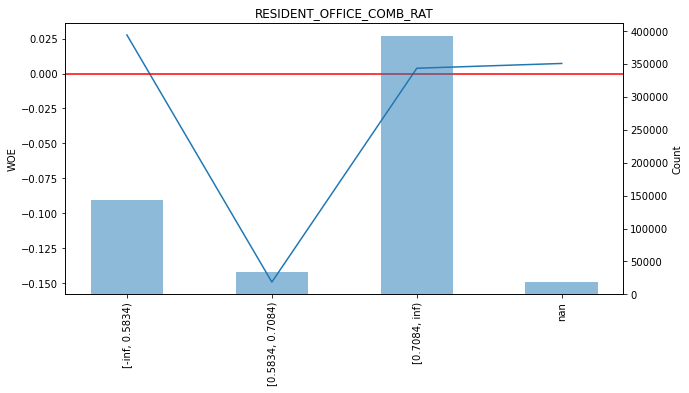

***

### RISK_SCORE

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RISK_SCORE,,,,,,,,
"[-inf, 0.02923)",429301.0,6268.0,0.0146,0.4563,0.7360,0.4537,0.4780,0.7295
"[0.02923, 0.05528)",119544.0,4730.0,0.0396,0.3444,0.1998,-0.5275,-0.5446,0.2031
"[0.05528, inf)",39657.0,2738.0,0.0690,0.1993,0.0642,-1.1048,-1.1324,0.0674
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.3654
Gini: 29.74


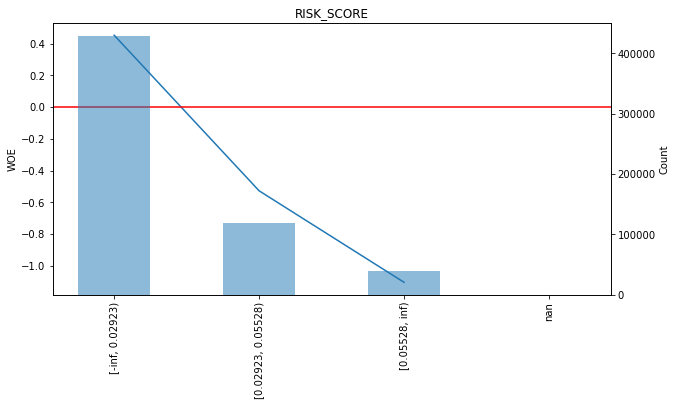

***

### ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.2916)",30720.0,975.0,0.0317,0.0710,0.0518,-0.305,-0.3160,0.0522
"[0.2916, 0.875)",319540.0,7791.0,0.0244,0.5672,0.5424,-0.043,-0.0447,0.5430
"[0.875, inf)",238242.0,4970.0,0.0209,0.3618,0.4059,0.110,0.1148,0.4048
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0122
Gini: 5.32


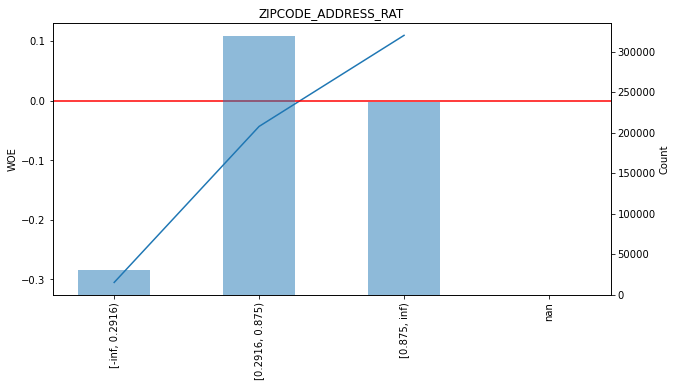

***

### ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ZIPCODE_CNT,,,,,,,,
"[-inf, 1.5)",300061.0,6778.0,0.0226,0.4934,0.5103,0.0321,0.0335,0.5099
"[1.5, 2.5)",213821.0,5010.0,0.0234,0.3647,0.3633,-0.0038,-0.0039,0.3633
"[2.5, inf)",74620.0,1948.0,0.0261,0.1418,0.1264,-0.1104,-0.1148,0.1268
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.7339,0.0000


IV: 0.0023
Gini: 2.22


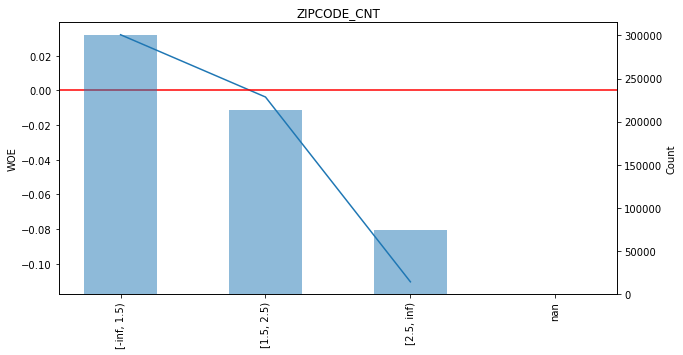

In [21]:
grouping.plot_bins(data=df_train, cols_pred_num=cols_pred_num, cols_pred_cat=cols_pred_cat,
                    mask = pd.Series(df_train["RISK_FSTQPD60"]>=0),col_target="RISK_FSTQPD60", 
                   output_folder=r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN", col_weight=None)